# Data Analytics Lifecycle

In [80]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png")

In [81]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.dataprix.com/files/CRISPDM/Metodologia_CRISP_DM1_html_52cdbecf.png")

**Data understanding and data preparation** are two important phases in data analytics project. 

These two stages are also called **"Extract Transform Loading" (ETL)**

# ETL (Extract Transform Loading): What? Why?
ETL represents a broad range of data transformation and processing techniques. ETL involves cleaning and transforming the data for data analysis. 

## Garbage In, Garbage Out##

Similar terms include **data munging**, **wrangling**, and **data transformation**

* Original data are not ready for analysis
* A typical data set or source contains many data quality issues
    * Missing values
    * Inconsistency
    * Inaccuracy
    * …
* Data preparation (or transformation) is a must

<img src="images\etl.gif">

# How much time do data analysts spend cleaning and transforming data?

<img src="images/Time1.jpg">
<img src="images/Time2.jpg">

# This ETL module will cover:

* Basic techniques (data cleaning) 
* Intermediate-level techniques (data transformation)
* Advanced techniques (data integration)

# Different data types

* **Numerical** refers to integer and real
    * Integer number (int): age
    * Real number (float): price
* **Object (or string)**
    * **Nominal** or polynominal means there are more than two different values in the attributes. For example, Maritial_Status (single, married, divorced), school year (freshman, sophomore, junior, senior)
    * **Binominal** means only two values. For example, Exam grade (Pass, Fail), Admission (Acceptance, Rejection), Purchase (Yes, Or), Cheating (True, False)


# Basic ETL techniques
This covers basic ETL techniques

Relevant online resources: 10 Minutes to pandas 
* Numerical columns http://pandas.pydata.org/pandas-docs/stable/10min.html
* Categorical columns http://pandas-docs.github.io/pandas-docs-travis/categorical.html

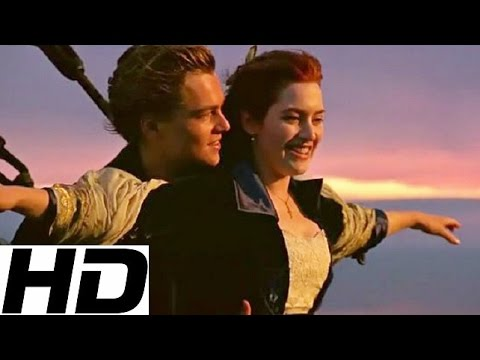

In [82]:
from IPython.display import YouTubeVideo
YouTubeVideo('DNyKDI9pn0Q')

# Titanic Dataset

<img src="images\titanic_datadescription.gif">

In [83]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [84]:
# import titanic_train.csv
ti=pd.read_csv("data/titanic_train.csv")
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,350.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",hi,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",hello,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.35,0,0,373450,8.0500,NaN,S


# Essential Data Transformation

### Finding out data type & missing values

In [85]:
#data types & missing values
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Numerical columns**: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

**Categorial columns**: Name, Sex, Ticket, Cabin, Embarked

There are some **missing values (Age, Cabin, Embarked)**

**This dataset needs data cleaning & transformation**

### Basic statistics

In [86]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.087563,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,18.863424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.350000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,350.000000,8.000000,6.000000,512.329200


There are a number of **data quality issues**
- Someone or some people are 350 years old 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112e68b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113232850>]], dtype=object)

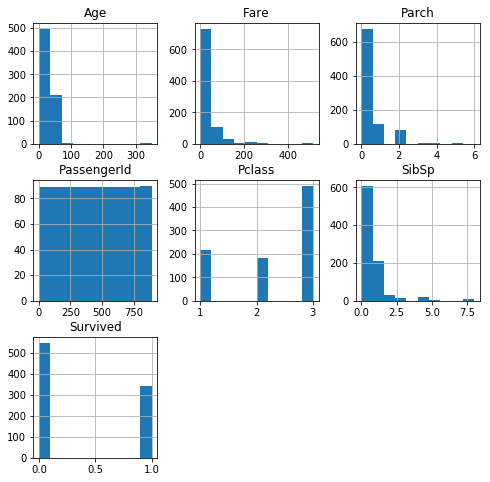

In [87]:
ti.hist(figsize=(8,8))

In [88]:
# describe for a single column
ti['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [89]:
# do this for categorical columns
ti['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

- Three different ports of departure (C = Cherbourg; Q = Queenstown; S = Southhampton)
- S is the most popular port. 644 boared on Titanic from S

In [90]:
ti.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [91]:
# how many unique values in the Sex column
ti.groupby('Sex').size()

Sex
female    312
hello       1
hi          1
male      577
dtype: int64

** Is there any data quality issue here?**

### Remove (unnessary) columns

In [92]:
# remove an unnecessary column (PassengerId)

ti = ti.drop('PassengerId', axis=1)
ti.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,350.00,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",hi,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",hello,35.00,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,0.35,0,0,373450,8.0500,NaN,S


In [93]:
# remove multiple columns (Name, Ticket, Cabin)

ti = ti.drop(['Name','Ticket'], axis=1)
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.00,1,0,7.2500,NaN,S
1,1,1,female,350.00,1,0,71.2833,C85,C
2,1,3,hi,26.00,0,0,7.9250,NaN,S
3,1,1,hello,35.00,1,0,53.1000,C123,S
4,0,3,male,0.35,0,0,8.0500,NaN,S


In [94]:
# can you remove Cabin column? (this column is not much useful for further analysis - predictive analytics)
ti = ti.drop(['Cabin'], axis=1)
ti.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,350.00,1,0,71.2833,C
2,1,3,hi,26.00,0,0,7.9250,S
3,1,1,hello,35.00,1,0,53.1000,S
4,0,3,male,0.35,0,0,8.0500,S


In [95]:
# how many missing values in each column or variable
ti.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Handling missing value
there are different ways to handle missing values
- drop them all
- replace with certain values (e.g., mean, mode, median, specific value)

In [96]:
#handling missing value: remove the rows with any missing value
ti_rev = ti.dropna()
ti_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


Now, the dataset has 712 rows. No rows with missing values. This is an aggressive approach.

In [97]:
# replace null value with the most popular value in a categorial columns
ti = ti.fillna({'Embarked': 'S'})
ti.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [98]:
ti['Age'].median()

28.0

In [99]:
ti['Age'].mean()

30.08756302521008

In [100]:
# replace null value with the median value 
ti = ti.fillna({'Age': 28})
ti.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [101]:
# what would you do to replace null values with the mean value
ti_rev = ti.fillna({'Embarked': '29.67'})
ti_rev.isnull().sum()



Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Handling Inaccurate/Inconsistent Data
- replace inaccurate values with null values and remove the row(s) with missing values
- replace inaccurate values with different values

In [102]:
# hello in Sex is inaccurate ...replacing inaccurate value with null value
ti = ti.replace('hello', np.nan)
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,350.00,1,0,71.2833,C
2,1,3,hi,26.00,0,0,7.9250,S
3,1,1,NaN,35.00,1,0,53.1000,S
4,0,3,male,0.35,0,0,8.0500,S


In [103]:
ti = ti.dropna()
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,350.00,1,0,71.2833,C
2,1,3,hi,26.00,0,0,7.9250,S
4,0,3,male,0.35,0,0,8.0500,S
5,0,3,male,28.00,0,0,8.4583,Q


In [104]:
# 350 is an inaccurate value for age and should be replaced by 35
# changinge single value with replace
ti = ti.replace({'Age': 350}, {'Age': 35})
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,35.00,1,0,71.2833,C
2,1,3,hi,26.00,0,0,7.9250,S
4,0,3,male,0.35,0,0,8.0500,S
5,0,3,male,28.00,0,0,8.4583,Q


In [105]:
ti.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.383146,2.310112,29.312944,0.522472,0.382022,32.180730
std,0.486427,0.835388,13.058632,1.103247,0.806409,49.716425
min,0.000000,1.000000,0.350000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
# instead of replacing hello with null value and removing the row, 
# can you replace hi with the most popular value (male) in the categorical column? 



In [107]:
ti = ti.replace({'Sex':'hi'}, {'Sex':'male'})
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,35.00,1,0,71.2833,C
2,1,3,male,26.00,0,0,7.9250,S
4,0,3,male,0.35,0,0,8.0500,S
5,0,3,male,28.00,0,0,8.4583,Q


In [108]:
# Now, there should be male and female in the Sex column

# chaing categorical values with map
ti['Sex'] = ti['Sex'].map({'female': 0, 'male': 1})
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.2500,S
1,1,1,0,35.00,1,0,71.2833,C
2,1,3,1,26.00,0,0,7.9250,S
4,0,3,1,0.35,0,0,8.0500,S
5,0,3,1,28.00,0,0,8.4583,Q


In [109]:
# when you analyze data, it is better to transform categorical values to numerical values
# can you convert S, C, Q (Embarked) to 1, 2, 3

# chaing categorical values with map
ti['Embarked'] = ti['Embarked'].map({'S': 1, 'C': 2, 'Q' : 3})
ti.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.2500,1
1,1,1,0,35.00,1,0,71.2833,2
2,1,3,1,26.00,0,0,7.9250,1
4,0,3,1,0.35,0,0,8.0500,1
5,0,3,1,28.00,0,0,8.4583,3


After applying multiple techniques of data cleaning, the data looks good now. Perhaps, this cleaned data can be used for analysis & builing predictive model.
The predictive model would predict who is likely to survive, while using Survived as y value

In [110]:
# if the data cleaning is done, you may want to export it as csv or excel

ti.to_csv("data/ti_cleaned.csv")

# Intermediate-level Data Transformation

In [111]:
# create new columns
ti['CurrentAge'] = ti['Age'] + 90
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge
0,0,3,1,22.00,1,0,7.2500,1,112.00
1,1,1,0,35.00,1,0,71.2833,2,125.00
2,1,3,1,26.00,0,0,7.9250,1,116.00
4,0,3,1,0.35,0,0,8.0500,1,90.35
5,0,3,1,28.00,0,0,8.4583,3,118.00


In [112]:
# can you create a new column ("discount") based on Fare?
# discount = Fare * 0.25
ti['discount'] = ti['Fare']*0.25
ti.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,discount
0,0,3,1,22.00,1,0,7.2500,1,112.00,1.812500
1,1,1,0,35.00,1,0,71.2833,2,125.00,17.820825
2,1,3,1,26.00,0,0,7.9250,1,116.00,1.981250
4,0,3,1,0.35,0,0,8.0500,1,90.35,2.012500
5,0,3,1,28.00,0,0,8.4583,3,118.00,2.114575


In [113]:
# create a copy of existing column
ti['DeparturePort'] = ti['Embarked']
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,discount,DeparturePort
0,0,3,1,22.00,1,0,7.2500,1,112.00,1.812500,1
1,1,1,0,35.00,1,0,71.2833,2,125.00,17.820825,2
2,1,3,1,26.00,0,0,7.9250,1,116.00,1.981250,1
4,0,3,1,0.35,0,0,8.0500,1,90.35,2.012500,1
5,0,3,1,28.00,0,0,8.4583,3,118.00,2.114575,3


In [115]:
# rename columns
ti = ti.rename(columns={'Pclass': 'PassengerClass'})
ti.head()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort
0,0,3,1,22.00,1,0,7.2500,1,112.00,1.812500,1
1,1,1,0,35.00,1,0,71.2833,2,125.00,17.820825,2
2,1,3,1,26.00,0,0,7.9250,1,116.00,1.981250,1
4,0,3,1,0.35,0,0,8.0500,1,90.35,2.012500,1
5,0,3,1,28.00,0,0,8.4583,3,118.00,2.114575,3


In [114]:
# Can you rename discount as Disc
ti = ti.rename(columns = {'discount': 'Disc'})
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort
0,0,3,1,22.00,1,0,7.2500,1,112.00,1.812500,1
1,1,1,0,35.00,1,0,71.2833,2,125.00,17.820825,2
2,1,3,1,26.00,0,0,7.9250,1,116.00,1.981250,1
4,0,3,1,0.35,0,0,8.0500,1,90.35,2.012500,1
5,0,3,1,28.00,0,0,8.4583,3,118.00,2.114575,3


In [116]:
# create bins (discretize)

ti['Fare_Category'] = pd.qcut(ti['Fare'], 5)
ti.head()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category
0,0,3,1,22.00,1,0,7.2500,1,112.00,1.812500,1,"(-0.001, 7.854]"
1,1,1,0,35.00,1,0,71.2833,2,125.00,17.820825,2,"(39.688, 512.329]"
2,1,3,1,26.00,0,0,7.9250,1,116.00,1.981250,1,"(7.854, 10.5]"
4,0,3,1,0.35,0,0,8.0500,1,90.35,2.012500,1,"(7.854, 10.5]"
5,0,3,1,28.00,0,0,8.4583,3,118.00,2.114575,3,"(7.854, 10.5]"


In [117]:
ti.groupby('Fare_Category').count()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort
Fare_Category,,,,,,,,,,,
"(-0.001, 7.854]",179,179,179,179,179,179,179,179,179,179,179
"(7.854, 10.5]",184,184,184,184,184,184,184,184,184,184,184
"(10.5, 21.317]",171,171,171,171,171,171,171,171,171,171,171
"(21.317, 39.688]",181,181,181,181,181,181,181,181,181,181,181
"(39.688, 512.329]",175,175,175,175,175,175,175,175,175,175,175


In [118]:
#rename the name of those bins to 1, 2, 3, 4, 5
ti['Fare_Category_Labels'] = pd.qcut(ti['Fare'], 5, labels=['1', '2', '3', '4', '5'])
ti.head()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category,Fare_Category_Labels
0,0,3,1,22.00,1,0,7.2500,1,112.00,1.812500,1,"(-0.001, 7.854]",1
1,1,1,0,35.00,1,0,71.2833,2,125.00,17.820825,2,"(39.688, 512.329]",5
2,1,3,1,26.00,0,0,7.9250,1,116.00,1.981250,1,"(7.854, 10.5]",2
4,0,3,1,0.35,0,0,8.0500,1,90.35,2.012500,1,"(7.854, 10.5]",2
5,0,3,1,28.00,0,0,8.4583,3,118.00,2.114575,3,"(7.854, 10.5]",2


In [119]:
#Survived is categorical data type. What if I want to change it to integer
ti['Survived'] = ti['Survived'].astype(int)
ti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 13 columns):
Survived                890 non-null int64
PassengerClass          890 non-null int64
Sex                     890 non-null int64
Age                     890 non-null float64
SibSp                   890 non-null int64
Parch                   890 non-null int64
Fare                    890 non-null float64
Embarked                890 non-null int64
CurrentAge              890 non-null float64
Disc                    890 non-null float64
DeparturePort           890 non-null int64
Fare_Category           890 non-null category
Fare_Category_Labels    890 non-null category
dtypes: category(2), float64(4), int64(7)
memory usage: 85.4 KB


In [120]:
# filtering or selecting columns


#selecting two columns and assigning to a new variable or dataset called "ti_2"
ti_2 = ti[['Survived','Age']]
ti_2.head()

,Survived,Age
0,0,22.00
1,1,35.00
2,1,26.00
4,0,0.35
5,0,28.00


In [122]:
# can you select two other columns. use a different variable name (ti_3)
ti_3 = ti[['Fare', 'Disc']]
ti_3



,Fare,Disc
0,7.2500,1.812500
1,71.2833,17.820825
2,7.9250,1.981250
4,8.0500,2.012500
5,8.4583,2.114575
6,51.8625,12.965625
7,21.0750,5.268750
8,11.1333,2.783325
9,30.0708,7.517700
10,16.7000,4.175000


In [124]:
# Filtering or Selecting rows

#single criterion
Hight_paid = ti[(ti['Fare'] > 200)]
Hight_paid.to_csv("data/hight_paid.csv")

In [142]:
#Multiple conditions have to be combined using & 
ti[(ti['Fare'] > 200) & (ti['Survived'] < 25)]

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category,Fare_Category_Labels
27,0,1,1,19.0,3,2,263.0000,1,109.0,65.750000,1,"(39.688, 512.329]",5
88,1,1,0,23.0,3,2,263.0000,1,113.0,65.750000,1,"(39.688, 512.329]",5
118,0,1,1,24.0,0,1,247.5208,2,114.0,61.880200,2,"(39.688, 512.329]",5
258,1,1,0,35.0,0,0,512.3292,2,125.0,128.082300,2,"(39.688, 512.329]",5
299,1,1,0,50.0,0,1,247.5208,2,140.0,61.880200,2,"(39.688, 512.329]",5
311,1,1,0,18.0,2,2,262.3750,2,108.0,65.593750,2,"(39.688, 512.329]",5
341,1,1,0,24.0,3,2,263.0000,1,114.0,65.750000,1,"(39.688, 512.329]",5
377,0,1,1,27.0,0,2,211.5000,2,117.0,52.875000,2,"(39.688, 512.329]",5
380,1,1,0,42.0,0,0,227.5250,2,132.0,56.881250,2,"(39.688, 512.329]",5
438,0,1,1,64.0,1,4,263.0000,1,154.0,65.750000,1,"(39.688, 512.329]",5


In [128]:
highpaid_s = ti[(ti['Fare'] > 200) & (ti['Survived'] == 1)]
highpaid_s.describe()

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort
count,14.0,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.0,1.0,0.142857,30.500000,0.785714,0.857143,296.560421,1.642857,120.500000,74.140105,1.642857
std,0.0,0.0,0.363137,10.882237,1.188313,0.864438,118.565068,0.497245,10.882237,29.641267,0.497245
min,1.0,1.0,0.000000,15.000000,0.000000,0.000000,211.337500,1.000000,105.000000,52.834375,1.000000
25%,1.0,1.0,0.000000,21.500000,0.000000,0.000000,227.525000,1.000000,111.500000,56.881250,1.000000
50%,1.0,1.0,0.000000,32.000000,0.000000,1.000000,254.947900,2.000000,122.000000,63.736975,2.000000
75%,1.0,1.0,0.000000,37.500000,1.750000,1.750000,263.000000,2.000000,127.500000,65.750000,2.000000
max,1.0,1.0,1.000000,50.000000,3.000000,2.000000,512.329200,2.000000,140.000000,128.082300,2.000000


Some passengers in upper class did not survived.

In [ ]:
# can you create a filter using a criterion?




In [136]:
# sampling data

#sampling 10 rows only
#data.index is the artifical number assigned to each row (e.g., 0,1,2,3,4,5) 
# ... for example, 1st row's index is 0, 2nd row's index is 1 ...
import random
#select 10 index numbers
rows = random.sample(ti.index, 10)
#select 10 rows corresponding to those 10 index numbers
ti_10 = ti.loc[rows]
ti_10

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category,Fare_Category_Labels
137,0,1,1,37.0,1,0,53.1000,1,127.0,13.275000,1,"(39.688, 512.329]",5
145,0,2,1,19.0,1,1,36.7500,1,109.0,9.187500,1,"(21.317, 39.688]",4
177,0,1,0,50.0,0,0,28.7125,2,140.0,7.178125,2,"(21.317, 39.688]",4
278,0,3,1,7.0,4,1,29.1250,3,97.0,7.281250,3,"(21.317, 39.688]",4
704,0,3,1,26.0,1,0,7.8542,1,116.0,1.963550,1,"(-0.001, 7.854]",1
332,0,1,1,38.0,0,1,153.4625,1,128.0,38.365625,1,"(39.688, 512.329]",5
869,1,3,1,4.0,1,1,11.1333,1,94.0,2.783325,1,"(10.5, 21.317]",3
683,0,3,1,14.0,5,2,46.9000,1,104.0,11.725000,1,"(39.688, 512.329]",5
123,1,2,0,32.5,0,0,13.0000,1,122.5,3.250000,1,"(10.5, 21.317]",3
74,1,3,1,32.0,0,0,56.4958,1,122.0,14.123950,1,"(39.688, 512.329]",5


In [137]:
# sort data by column

#sorting: ascending=True is the default
ti_10.sort_values(by=['Fare'])

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category,Fare_Category_Labels
704,0,3,1,26.0,1,0,7.8542,1,116.0,1.963550,1,"(-0.001, 7.854]",1
869,1,3,1,4.0,1,1,11.1333,1,94.0,2.783325,1,"(10.5, 21.317]",3
123,1,2,0,32.5,0,0,13.0000,1,122.5,3.250000,1,"(10.5, 21.317]",3
177,0,1,0,50.0,0,0,28.7125,2,140.0,7.178125,2,"(21.317, 39.688]",4
278,0,3,1,7.0,4,1,29.1250,3,97.0,7.281250,3,"(21.317, 39.688]",4
145,0,2,1,19.0,1,1,36.7500,1,109.0,9.187500,1,"(21.317, 39.688]",4
683,0,3,1,14.0,5,2,46.9000,1,104.0,11.725000,1,"(39.688, 512.329]",5
137,0,1,1,37.0,1,0,53.1000,1,127.0,13.275000,1,"(39.688, 512.329]",5
74,1,3,1,32.0,0,0,56.4958,1,122.0,14.123950,1,"(39.688, 512.329]",5
332,0,1,1,38.0,0,1,153.4625,1,128.0,38.365625,1,"(39.688, 512.329]",5


In [138]:
ti_10.sort_values(by=['Fare'], ascending=False)

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category,Fare_Category_Labels
332,0,1,1,38.0,0,1,153.4625,1,128.0,38.365625,1,"(39.688, 512.329]",5
74,1,3,1,32.0,0,0,56.4958,1,122.0,14.123950,1,"(39.688, 512.329]",5
137,0,1,1,37.0,1,0,53.1000,1,127.0,13.275000,1,"(39.688, 512.329]",5
683,0,3,1,14.0,5,2,46.9000,1,104.0,11.725000,1,"(39.688, 512.329]",5
145,0,2,1,19.0,1,1,36.7500,1,109.0,9.187500,1,"(21.317, 39.688]",4
278,0,3,1,7.0,4,1,29.1250,3,97.0,7.281250,3,"(21.317, 39.688]",4
177,0,1,0,50.0,0,0,28.7125,2,140.0,7.178125,2,"(21.317, 39.688]",4
123,1,2,0,32.5,0,0,13.0000,1,122.5,3.250000,1,"(10.5, 21.317]",3
869,1,3,1,4.0,1,1,11.1333,1,94.0,2.783325,1,"(10.5, 21.317]",3
704,0,3,1,26.0,1,0,7.8542,1,116.0,1.963550,1,"(-0.001, 7.854]",1


In [139]:
# Ascending by first column, then descending by second column
ti_10.sort_values(by=['Survived','Age'], ascending=[1,0])

,Survived,PassengerClass,Sex,Age,SibSp,Parch,Fare,Embarked,CurrentAge,Disc,DeparturePort,Fare_Category,Fare_Category_Labels
177,0,1,0,50.0,0,0,28.7125,2,140.0,7.178125,2,"(21.317, 39.688]",4
332,0,1,1,38.0,0,1,153.4625,1,128.0,38.365625,1,"(39.688, 512.329]",5
137,0,1,1,37.0,1,0,53.1000,1,127.0,13.275000,1,"(39.688, 512.329]",5
704,0,3,1,26.0,1,0,7.8542,1,116.0,1.963550,1,"(-0.001, 7.854]",1
145,0,2,1,19.0,1,1,36.7500,1,109.0,9.187500,1,"(21.317, 39.688]",4
683,0,3,1,14.0,5,2,46.9000,1,104.0,11.725000,1,"(39.688, 512.329]",5
278,0,3,1,7.0,4,1,29.1250,3,97.0,7.281250,3,"(21.317, 39.688]",4
123,1,2,0,32.5,0,0,13.0000,1,122.5,3.250000,1,"(10.5, 21.317]",3
74,1,3,1,32.0,0,0,56.4958,1,122.0,14.123950,1,"(39.688, 512.329]",5
869,1,3,1,4.0,1,1,11.1333,1,94.0,2.783325,1,"(10.5, 21.317]",3


In [140]:
# you can expport this sample data 

ti_10.to_csv("data/ti_10.csv")

In [141]:
# can you sample 50 rows?




In [ ]:
# apply sorting (descending, ascending)




References
- Cleaning Big Data: Most Time-Consuming, Least Enjoyable Data Science Task, Survey Sayshttp://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#62eb1cc37f75